In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline


### Ignore warnings


In [ ]:
import warnings

warnings.filterwarnings('ignore')

# **Import dataset** <a class="anchor" id="7"></a>



In [ ]:
data = 'Data2.csv'

df = pd.read_csv(data)


# **Exploratory data analysis** <a class="anchor" id="8"></a>



### Check shape of the dataset

In [ ]:
df.shape

(100000, 9)

### Preview the dataset

In [ ]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 17:27:14 UTC,view,15100122,2.050000e+18,electronics.smartphone,samsung,1747.77,555723570,05065661-a208-4c72-abb4-516b19dd07a1
1,2019-10-01 17:27:14 UTC,view,26300079,2.050000e+18,furniture.bedroom.blanket,lucente,331.28,554873373,c8defff8-e489-4089-ab03-f68eaa5a0ef1
2,2019-10-01 17:27:14 UTC,view,2601810,2.050000e+18,electronics.audio.headphone,artel,155.29,534441548,aecad93a-9999-4e44-8df7-5920026fedb4
3,2019-10-01 17:27:14 UTC,view,26400182,2.050000e+18,electronics.smartphone,xiaomi,150.33,536638476,4aa9a639-6dd8-4327-846a-2384214bb114
4,2019-10-01 17:27:14 UTC,view,5700282,2.050000e+18,auto.accessories.player,alpine,142.86,519044318,d04cf1af-cfdf-4e22-8cbf-ef48c27ca5c1


### View summary of dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     100000 non-null  object 
 1   event_type     100000 non-null  object 
 2   product_id     100000 non-null  int64  
 3   category_id    100000 non-null  float64
 4   category_code  99706 non-null   object 
 5   brand          99985 non-null   object 
 6   price          100000 non-null  float64
 7   user_id        100000 non-null  int64  
 8   user_session   100000 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 6.9+ MB


### Check for missing values in dataset

In [ ]:
df.isnull().sum()

,0
event_time,0
event_type,0
product_id,0
category_id,0
category_code,294
brand,15
price,0
user_id,0
user_session,0


### Drop redundant columns

In [ ]:
df.drop(['category_id'], axis=1, inplace=True)

### Again view summary of dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     100000 non-null  object 
 1   event_type     100000 non-null  object 
 2   product_id     100000 non-null  int64  
 3   category_code  99706 non-null   object 
 4   brand          99985 non-null   object 
 5   price          100000 non-null  float64
 6   user_id        100000 non-null  int64  
 7   user_session   100000 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 6.1+ MB


### View the statistical summary of numerical variables

In [ ]:
df.describe()

,product_id,price,user_id
count,1.000000e+05,100000.000000,1.000000e+05
mean,1.070983e+07,298.472190,5.315976e+08
std,1.161777e+07,365.528237,1.675044e+07
min,1.001588e+06,0.000000,3.537336e+08
25%,1.005115e+06,69.240000,5.158210e+08
50%,5.100503e+06,169.860000,5.277639e+08
75%,1.730165e+07,368.040000,5.481782e+08
max,5.390001e+07,2574.070000,5.557277e+08


In [ ]:
df['event_time'].unique()

array(['2019-10-01 17:27:14 UTC', '2019-10-01 17:27:15 UTC',
       '2019-10-01 17:27:16 UTC', ..., '2019-10-01 15:58:21 UTC',
       '2019-10-01 15:58:22 UTC', '2019-10-01 15:58:23 UTC'], dtype=object)

In [ ]:
len(df['event_time'].unique())

3897

In [ ]:
df['user_session'].unique()

array(['05065661-a208-4c72-abb4-516b19dd07a1',
       'c8defff8-e489-4089-ab03-f68eaa5a0ef1',
       'aecad93a-9999-4e44-8df7-5920026fedb4', ...,
       '544bbbc8-786a-4aa4-8f27-6fbd12115a65',
       '499e4b45-e608-43c9-bbbd-c04172993303',
       '7f108076-5531-4b3f-b6bf-66aa6e9b4d6a'], dtype=object)

In [ ]:
len(df['user_session'].unique())

22757

In [ ]:
df['event_type'].unique()

array(['view', 'cart', 'purchase'], dtype=object)

In [ ]:
len(df['event_type'].unique())

3

In [ ]:
df['category_code'].unique()

array(['electronics.smartphone', 'furniture.bedroom.blanket',
       'electronics.audio.headphone', 'auto.accessories.player',
       'computers.components.motherboard', 'kids.swing',
       'electronics.clocks', 'electronics.audio.subwoofer',
       'apparel.shoes.keds', 'computers.notebook',
       'construction.tools.generator', 'appliances.environment.vacuum',
       'electronics.video.tv', 'furniture.living_room.cabinet',
       'furniture.bedroom.bed', 'apparel.shoes',
       'furniture.kitchen.chair', 'appliances.kitchen.refrigerators',
       'construction.tools.saw', 'appliances.environment.water_heater',
       'appliances.kitchen.steam_cooker', 'appliances.kitchen.oven',
       'appliances.kitchen.mixer', 'appliances.iron',
       'appliances.kitchen.kettle',
       'appliances.environment.air_conditioner', 'auto.accessories.alarm',
       'computers.desktop', 'appliances.sewing_machine',
       'furniture.kitchen.table', 'electronics.tablet',
       'appliances.kitchen.wash

In [ ]:
len(df['category_code'].unique())

124

In [ ]:
df['brand'].unique()

array(['samsung', 'lucente', 'artel', ..., 'elaud', 'regent', 'cityrover'],
      dtype=object)

In [ ]:
len(df['brand'].unique())

1570

### View the summary of dataset again

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   event_time     100000 non-null  object 
 1   event_type     100000 non-null  object 
 2   product_id     100000 non-null  int64  
 3   category_code  99706 non-null   object 
 4   brand          99985 non-null   object 
 5   price          100000 non-null  float64
 6   user_id        100000 non-null  int64  
 7   user_session   100000 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 6.1+ MB


### Preview the dataset again

In [ ]:
df.head()

,event_time,event_type,product_id,category_code,brand,price,user_id,user_session
0,2019-10-01 17:27:14 UTC,view,15100122,electronics.smartphone,samsung,1747.77,555723570,05065661-a208-4c72-abb4-516b19dd07a1
1,2019-10-01 17:27:14 UTC,view,26300079,furniture.bedroom.blanket,lucente,331.28,554873373,c8defff8-e489-4089-ab03-f68eaa5a0ef1
2,2019-10-01 17:27:14 UTC,view,2601810,electronics.audio.headphone,artel,155.29,534441548,aecad93a-9999-4e44-8df7-5920026fedb4
3,2019-10-01 17:27:14 UTC,view,26400182,electronics.smartphone,xiaomi,150.33,536638476,4aa9a639-6dd8-4327-846a-2384214bb114
4,2019-10-01 17:27:14 UTC,view,5700282,auto.accessories.player,alpine,142.86,519044318,d04cf1af-cfdf-4e22-8cbf-ef48c27ca5c1


In [ ]:
import pandas as pd

# Convert event_time to datetime objects
df['event_time'] = pd.to_datetime(df['event_time'])

In [ ]:
df['event_time'].head()

,event_time
0,2019-10-01 17:27:14+00:00
1,2019-10-01 17:27:14+00:00
2,2019-10-01 17:27:14+00:00
3,2019-10-01 17:27:14+00:00
4,2019-10-01 17:27:14+00:00


In [ ]:
import pandas as pd

# Convert event_time to datetime objects
df['event_time'] = pd.to_datetime(df['event_time'])

# Group by user_session and get the minimum and maximum event_time
def get_session_times(x):
  return pd.Series([x['event_time'].min(), x['event_time'].max()], index=['begin', 'end'])

# Pass the grouping columns as a list
session_times = df.groupby(['user_session','event_type', 'category_code','brand']).apply(get_session_times)

# Reset index to make 'user_session' a column
session_times = session_times.reset_index()

# Export to CSV
session_times.to_csv('sel_user_sessions.csv', index=False)

In [ ]:
df = session_times

X = df

y = df['end']

In [ ]:
X[['user_session','event_type', 'category_code','brand']]

,user_session,begin,end
0,00012d23-c857-40af-b8cb-ada787bc00cc,2019-10-01 15:49:07+00:00,2019-10-01 15:49:51+00:00
1,00065628-6b31-4a11-95e8-6bcaea5fd4c7,2019-10-01 15:29:00+00:00,2019-10-01 15:36:38+00:00
2,00089a11-2c3c-4fe4-9ad9-7d80b7dd1124,2019-10-01 15:51:23+00:00,2019-10-01 15:57:29+00:00
3,000cc786-fbbf-433a-b3d3-1c8f5660ac25,2019-10-01 15:50:59+00:00,2019-10-01 15:50:59+00:00
4,000cebe3-a4ff-4e36-b12e-7e3dda35c7f4,2019-10-01 15:02:14+00:00,2019-10-01 15:03:55+00:00
...,...,...,...
22752,ffe3dcfd-6d4e-471e-b8f6-2b5470303a40,2019-10-01 15:13:30+00:00,2019-10-01 15:13:30+00:00
22753,ffe550ef-7680-4fa8-8b4e-792cf2b6f535,2019-10-01 14:56:27+00:00,2019-10-01 14:58:52+00:00
22754,ffebbdd3-9dfc-487a-8278-fdcfb25fb5eb,2019-10-01 15:15:23+00:00,2019-10-01 15:15:23+00:00
22755,ffec6994-11b1-4494-abe2-b9b1b9e9a7b0,2019-10-01 15:08:42+00:00,2019-10-01 15:13:53+00:00


# **Convert categorical variable into integers** <a class="anchor" id="10"></a>


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Iterate through each column and apply Label Encoding
for col in ['user_session','event_type', 'category_code','brand']:
    X[col] = le.fit_transform(X[col])

y = le.fit_transform(y) #'y' is a 1D array or Series

### View the summary of X

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60501 entries, 0 to 60500
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   user_session   60501 non-null  int64              
 1   event_type     60501 non-null  int64              
 2   category_code  60501 non-null  int64              
 3   brand          60501 non-null  int64              
 4   begin          60501 non-null  datetime64[ns, UTC]
 5   end            60501 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](2), int64(4)
memory usage: 2.8 MB


**Convert 'begin' and 'end' to datetime objects**

In [ ]:
import pandas as pd

# DataFrame is named 'df'

# Convert 'begin' and 'end' to datetime objects
df['begin'] = pd.to_datetime(df['begin'])
df['end'] = pd.to_datetime(df['end'])

# Convert to "hh:mm:ss" format
df['begin_hhmmss'] = df['begin'].dt.strftime('%H:%M:%S')
df['end_hhmmss'] = df['end'].dt.strftime('%H:%M:%S')

# replace the original 'begin' and 'end' columns:
df['begin'] = df['begin_hhmmss']
df['end'] = df['end_hhmmss']

# Drop the temporary columns created:
# df.drop(['begin_hhmmss', 'end_hhmmss'], axis=1, inplace=True)

### Preview the dataset X

In [ ]:
X.head()

,user_session,event_type,category_code,brand,begin,end,begin_hhmmss,end_hhmmss
0,0,2,27,1241,15:49:07,15:49:51,15:49:07,15:49:51
1,1,2,60,58,15:29:00,15:29:00,15:29:00,15:29:00
2,1,2,62,1241,15:36:38,15:36:38,15:36:38,15:36:38
3,1,2,63,98,15:36:02,15:36:02,15:36:02,15:36:02
4,1,2,63,578,15:29:32,15:35:48,15:29:32,15:35:48


In [ ]:
X = X.drop(['begin', 'end'], axis=1)

In [ ]:
import pandas as pd

# DataFrame is named 'df' and the columns are 'begin_hhmm' and 'end_hhmm'

# Function to convert "hh:mm:ss" to total seconds
def hhmmss_to_seconds(time_str):
    h, m, s = map(int, time_str.split(':'))
    return h * 3600 + m * 60 + s

# Apply the function to the columns
X['begin_seconds'] = df['begin_hhmmss'].apply(hhmmss_to_seconds)
X['end_seconds'] = df['end_hhmmss'].apply(hhmmss_to_seconds)

In [ ]:
import pandas as pd

# Calculate the difference in minutes and create a new column
X['duration_seconds'] = (X['end_seconds'] - X['begin_seconds'])
X.head()

,user_session,event_type,category_code,brand,begin,end,begin_hhmmss,end_hhmmss,begin_seconds,end_seconds,duration_seconds
0,0,2,27,1241,15:49:07,15:49:51,15:49:07,15:49:51,56947,56991,44
1,1,2,60,58,15:29:00,15:29:00,15:29:00,15:29:00,55740,55740,0
2,1,2,62,1241,15:36:38,15:36:38,15:36:38,15:36:38,56198,56198,0
3,1,2,63,98,15:36:02,15:36:02,15:36:02,15:36:02,56162,56162,0
4,1,2,63,578,15:29:32,15:35:48,15:29:32,15:35:48,55772,56148,376


In [ ]:
X = X.drop(['end_hhmmss','begin_seconds', 'end_seconds'], axis=1)

In [ ]:
X.head()

,user_session,event_type,category_code,brand,begin,duration_seconds
0,0,2,27,1241,15:49:07,44
1,1,2,60,58,15:29:00,0
2,1,2,62,1241,15:36:38,0
3,1,2,63,98,15:36:02,0
4,1,2,63,578,15:29:32,376


In [ ]:
X.to_csv('el_exported_data_time_treated.csv', index=False)

# **Feature Scaling** <a class="anchor" id="11"></a>


In [ ]:
cols = X.columns

In [ ]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [ ]:
X = pd.DataFrame(X, columns=[cols])

In [ ]:
X.head()

,user_session,event_type,category_code,brand,begin_hhmmss,end_hhmmss,begin_seconds,end_seconds,duration_seconds
0,00012d23-c857-40af-b8cb-ada787bc00cc,view,appliances.environment.vacuum,samsung,15:49:07,15:49:51,56947,56991,44
1,00065628-6b31-4a11-95e8-6bcaea5fd4c7,view,computers.components.cpu,amd,15:29:00,15:29:00,55740,55740,0
2,00065628-6b31-4a11-95e8-6bcaea5fd4c7,view,computers.components.memory,samsung,15:36:38,15:36:38,56198,56198,0
3,00065628-6b31-4a11-95e8-6bcaea5fd4c7,view,computers.components.motherboard,asrock,15:36:02,15:36:02,56162,56162,0
4,00065628-6b31-4a11-95e8-6bcaea5fd4c7,view,computers.components.motherboard,gigabyte,15:29:32,15:35:48,55772,56148,376


In [ ]:
X.to_csv('exported_data_time_treated_scaled.csv', index=False)

In [ ]:
#X = X.drop(['end_hhmm'], axis=1)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


features = ['event_type', 'category_code', 'brand', 'begin_seconds']
target = 'duration_seconds'

X_features = X[features]
y_target = X[target]

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=42)  # random_state for reproducibility



dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)


y_pred = dt_model.predict(X_test)

In [ ]:
# Evaluate the model
dt_pred = dt_model.predict(X_test)
mse = mean_squared_error(y_test, dt_pred)
rmse = np.sqrt(mse)  # Calculate RMSE
mae = mean_absolute_error(y_test, dt_pred)
r2 = r2_score(y_test, dt_pred)

print(f"Mean Squared Error (Test Set): {mse:.4f}")
print(f"Root Mean Squared Error (Test Set): {rmse:.4f}")
print(f"Mean Absolute Error (Test Set): {mae:.4f}")
print(f"R-squared (Test Set): {r2:.4f}")

Mean Squared Error (Test Set): 0.0059
Root Mean Squared Error (Test Set): 0.0771
Mean Absolute Error (Test Set): 0.0278
R-squared (Test Set): -0.9980


In [ ]:
import pandas as pd

# Create a DataFrame for comparison
dt_comparison_df = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': dt_pred.flatten()})

# Print the DataFrame
print(dt_comparison_df.head(50))

      Actual  Predicted
0   0.000000   0.000000
1   0.000000   0.000000
2   0.010974   0.156317
3   0.000000   0.000000
4   0.000000   0.000000
5   0.000000   0.000000
6   0.000000   0.000000
7   0.046842   0.000000
8   0.000000   0.000000
9   0.000000   0.000000
10  0.000000   0.000000
11  0.000000   0.000000
12  0.000000   0.000000
13  0.037473   0.000000
14  0.033994   0.000000
15  0.000000   0.033994
16  0.000000   0.000000
17  0.000000   0.000000
18  0.005086   0.000000
19  0.000000   0.000000
20  0.000000   0.000000
21  0.000000   0.250268
22  0.024893   0.000000
23  0.016060   0.101178
24  0.014454   0.000000
25  0.000000   0.000000
26  0.000000   0.000000
27  0.000000   0.000000
28  0.000000   0.000000
29  0.000000   0.000000
30  0.000000   0.000000
31  0.006959   0.000000
32  0.000000   0.000000
33  0.000000   0.000000
34  0.000000   0.000000
35  0.000000   0.000000
36  0.000000   0.000000
37  0.002677   0.040953
38  0.000000   0.000000
39  0.025696   0.047645
40  0.000000   0

      Actual  Predicted
0   0.000000   0.000000
1   0.000000   0.000000
2   0.010974   0.156317
3   0.000000   0.000000
4   0.000000   0.000000
5   0.000000   0.000000
6   0.000000   0.000000
7   0.046842   0.000000
8   0.000000   0.000000
9   0.000000   0.000000
10  0.000000   0.000000
11  0.000000   0.000000
12  0.000000   0.000000
13  0.037473   0.000000
14  0.033994   0.000000
15  0.000000   0.033994
16  0.000000   0.000000
17  0.000000   0.000000
18  0.005086   0.000000
19  0.000000   0.000000
20  0.000000   0.000000
21  0.000000   0.250268
22  0.024893   0.000000
23  0.016060   0.101178
24  0.014454   0.000000
25  0.000000   0.000000
26  0.000000   0.000000
27  0.000000   0.000000
28  0.000000   0.000000
29  0.000000   0.000000
30  0.000000   0.000000
31  0.006959   0.000000
32  0.000000   0.000000
33  0.000000   0.000000
34  0.000000   0.000000
35  0.000000   0.000000
36  0.000000   0.000000
37  0.002677   0.040953
38  0.000000   0.000000
39  0.025696   0.047645
40  0.000000   0

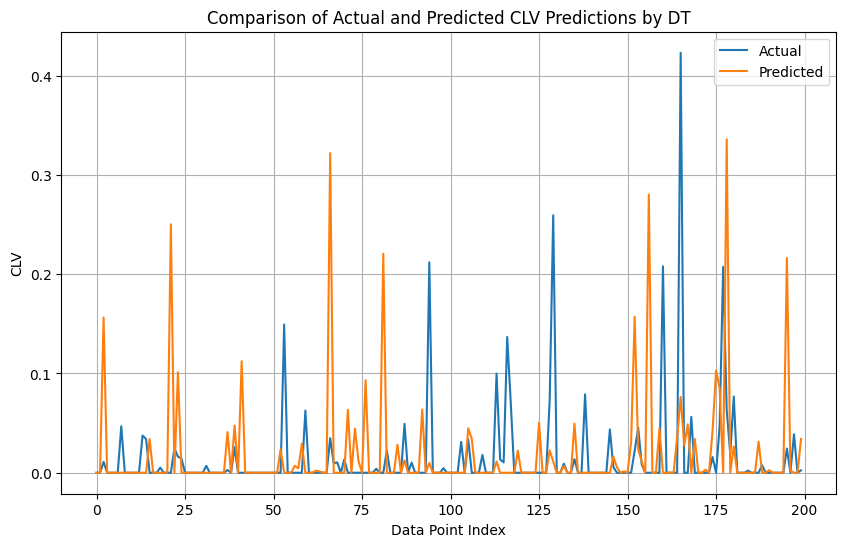

In [ ]:
import matplotlib.pyplot as plt

import pandas as pd

# Create a DataFrame for comparison
dt_comparison_df = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': dt_pred.flatten()})

# Print the DataFrame
print(dt_comparison_df.head(50))

# Select the first 200 data points
dt_comparison_df_subset = dt_comparison_df[:200]

# Plot the line graph
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.plot(dt_comparison_df_subset.index, dt_comparison_df_subset['Actual'], label='Actual')
plt.plot(dt_comparison_df_subset.index, dt_comparison_df_subset['Predicted'], label='Predicted')
plt.xlabel('Data Point Index')
plt.ylabel('CLV')
plt.title('Comparison of Actual and Predicted CLV Predictions by DT')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd

# Get hyperparameters from the trained model
hyperparameters = dt_model.get_params()

# Create a Pandas DataFrame
hyperparameter_df = pd.DataFrame(list(hyperparameters.items()), columns=['Hyperparameter', 'Value'])

# Display the DataFrame
print(hyperparameter_df)

              Hyperparameter          Value
0                  ccp_alpha            0.0
1                  criterion  squared_error
2                  max_depth           None
3               max_features           None
4             max_leaf_nodes           None
5      min_impurity_decrease            0.0
6           min_samples_leaf              1
7          min_samples_split              2
8   min_weight_fraction_leaf            0.0
9              monotonic_cst           None
10              random_state             42
11                  splitter           best


In [ ]:
#!pip install tensorflow
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np



features = ['user_session', 'event_type', 'category_code', 'brand', 'begin_seconds']
target = 'duration_seconds'

X_features = X[features]
y_target = X[target]


X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=42)




X_train_reshaped = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_reshaped = X_test.values.reshape(X_test.shape[0], 1, X_test.shape[1])


lstm_model = Sequential()
lstm_model.add(LSTM(100, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mse', optimizer='adam')
lstm_model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, verbose=1)


Epoch 1/50
1324/1324 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0032
Epoch 2/50
1324/1324 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0029
Epoch 3/50
1324/1324 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0031
Epoch 4/50
1324/1324 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0028
Epoch 5/50
1324/1324 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0030
Epoch 6/50
1324/1324 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0030
Epoch 7/50
1324/1324 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0030
Epoch 8/50
1324/1324 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0029
Epoch 9/50
1324/1324 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0030
Epoch 10/50
1324/1324 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0032
Epoch 11/50
1324/1324 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0031
Epoch 12/50
1324/1324 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0028
Epoch 13/50
1324/1324 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0029
Epoch 14/50
1324/1324 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0030
Epoch 15/50
1324/1324 ━━━━━━━

In [ ]:
import pandas as pd

# Define the hyperparameters and their values
hyperparameters = {
    'Units (LSTM)': 50,
    'Activation (LSTM)': 'ReLU',
    'Epochs': 50,
    'Batch Size': 32,
    'Loss Function': 'MSE',
    'Optimizer': 'Adam'
}

# Create a Pandas DataFrame
hyperparameter_df = pd.DataFrame(list(hyperparameters.items()), columns=['Hyperparameter', 'Value'])

# Display the DataFrame
print(hyperparameter_df)

      Hyperparameter Value
0       Units (LSTM)    50
1  Activation (LSTM)  ReLU
2             Epochs    50
3         Batch Size    32
4      Loss Function   MSE
5          Optimizer  Adam


In [ ]:
# Make predictions on the test set
#y_pred = lstm_model.predict(X_test)
lstm_pred = lstm_model.predict(X_test_reshaped).flatten()

# Evaluate the model
mse = mean_squared_error(y_test, lstm_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, lstm_pred)
r2 = r2_score(y_test, lstm_pred)

print(f"Mean Squared Error (Test Set): {mse:.4f}")
print(f"Root Mean Squared Error (Test Set): {rmse:.4f}")
print(f"Mean Absolute Error (Test Set): {mae:.4f}")
print(f"R-squared (Test Set): {r2:.4f}")

568/568 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Mean Squared Error (Test Set): 0.0029
Root Mean Squared Error (Test Set): 0.0541
Mean Absolute Error (Test Set): 0.0241
R-squared (Test Set): 0.0159


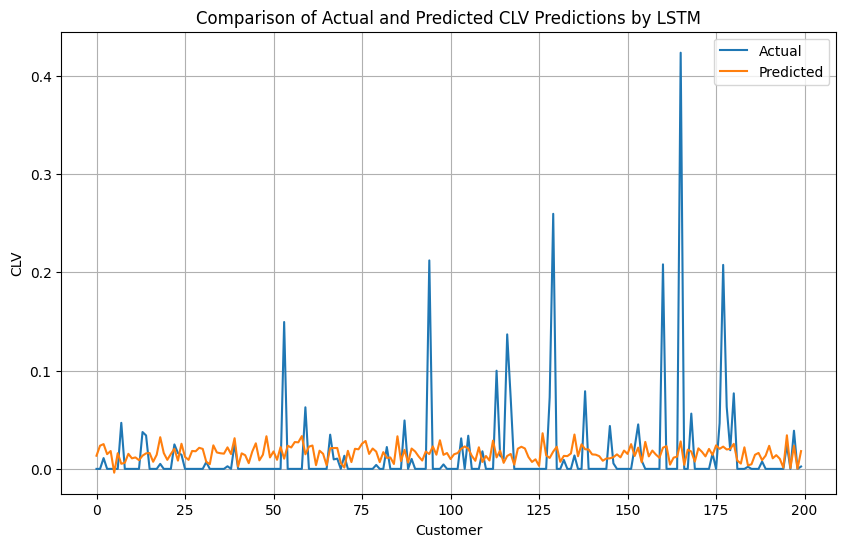

In [ ]:
import matplotlib.pyplot as plt

import pandas as pd

# Create a DataFrame for comparison
lstm_comparison_df = pd.DataFrame({'Actual': y_test.values.flatten(), 'Predicted': lstm_pred.flatten()})

# Print the DataFrame
#print(dt_comparison_df.head(50))

# Select the first 200 data points
lstm_comparison_df_subset = lstm_comparison_df[:200]

# Plot the line graph
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.plot(lstm_comparison_df_subset.index, lstm_comparison_df_subset['Actual'], label='Actual')
plt.plot(lstm_comparison_df_subset.index, lstm_comparison_df_subset['Predicted'], label='Predicted')
plt.xlabel('Customer')
plt.ylabel('CLV')
plt.title('Comparison of Actual and Predicted CLV Predictions by LSTM')
plt.legend()
plt.grid(True)
plt.show()

**ENSEMBLE MODEL**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


features = ['event_type', 'category_code', 'brand', 'begin_seconds']
target = 'duration_seconds'
X_features = X[features]
y_target = X[target]
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=42)

# Create and train the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Create and train the LSTM model
# Reshape data for LSTM
X_train_reshaped = X_train.values.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_reshaped = X_test.values.reshape(X_test.shape[0], 1, X_test.shape[1])

lstm_model = Sequential()
lstm_model.add(LSTM(100, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mse', optimizer='adam')
lstm_model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, verbose=1)

# Make predictions using both models
dt_pred = dt_model.predict(X_test)
lstm_pred = lstm_model.predict(X_test_reshaped).flatten()  # Flatten LSTM predictions

# Ensemble predictions (simple averaging)
#ensemble_pred = (dt_pred + lstm_pred.flatten()) / 2
ensemble_pred = (dt_pred + lstm_pred) / 2



Epoch 1/50
1324/1324 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0029
Epoch 2/50
1324/1324 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0029
Epoch 3/50
1324/1324 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0029
Epoch 4/50
1324/1324 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0030
Epoch 5/50
1324/1324 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0030
Epoch 6/50
1324/1324 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0030
Epoch 7/50
1324/1324 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0028
Epoch 8/50
1324/1324 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0027
Epoch 9/50
1324/1324 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0029
Epoch 10/50
1324/1324 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0026
Epoch 11/50
1324/1324 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0029
Epoch 12/50
1324/1324 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.0031
Epoch 13/50
1324/1324 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0029
Epoch 14/50
1324/1324 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0030
Epoch 15/50
1324/1324 ━━━━━━━

'mse = mean_squared_error(y_test, ensemble_pred)\nr2 = r2_score(y_test, ensemble_pred)\n\nprint(f"Ensemble Model - Mean Squared Error: {mse:.4f}")\nprint(f"Ensemble Model - R-squared: {r2:.4f}")'

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, ensemble_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, ensemble_pred)
r2 = r2_score(y_test, ensemble_pred)

print(f"Ensemble Model Mean Squared Error (Test Set): {mse:.4f}")
print(f"Ensemble Model Root Mean Squared Error (Test Set): {rmse:.4f}")
print(f"Ensemble Model Mean Absolute Error (Test Set): {mae:.4f}")
print(f"Ensemble Model R-squared (Test Set): {r2:.4f}")

Ensemble Model Mean Squared Error (Test Set): 0.0036
Ensemble Model Root Mean Squared Error (Test Set): 0.0602
Ensemble Model Mean Absolute Error (Test Set): 0.0249
Ensemble Model R-squared (Test Set): -0.2177


In [ ]:
import pandas as pd

# y_test and ensemble_pred already calculated

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({'y_test': y_test.values.flatten(), 'ensemble_pred': ensemble_pred.flatten()}) # Flatten both y_test and ensemble_pred

# Print the DataFrame
print(comparison_df.head(50))

      y_test  ensemble_pred
0   0.000000       0.004628
1   0.000000       0.009928
2   0.010974       0.090857
3   0.000000       0.006070
4   0.000000       0.009834
5   0.000000       0.000513
6   0.000000       0.005295
7   0.046842       0.000722
8   0.000000       0.001893
9   0.000000       0.005568
10  0.000000       0.010785
11  0.000000       0.005866
12  0.000000       0.003276
13  0.037473       0.007613
14  0.033994       0.006905
15  0.000000       0.023756
16  0.000000       0.007497
17  0.000000       0.003855
18  0.005086       0.012493
19  0.000000       0.006247
20  0.000000       0.004919
21  0.000000       0.131357
22  0.024893       0.010955
23  0.016060       0.057630
24  0.014454       0.010307
25  0.000000       0.004612
26  0.000000       0.004151
27  0.000000       0.009086
28  0.000000       0.007640
29  0.000000       0.011837
30  0.000000       0.010030
31  0.006959       0.002747
32  0.000000       0.002233
33  0.000000       0.008232
34  0.000000       0

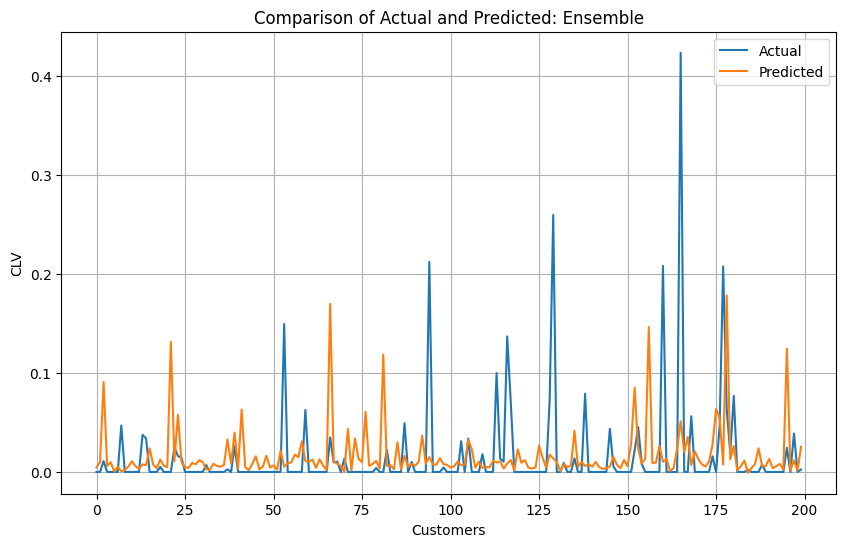

In [ ]:
import matplotlib.pyplot as plt

# comparison_df from the previous step

# Select the first 200 data points
comparison_df_subset = comparison_df[:200]

# Plot the line graph
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.plot(comparison_df_subset.index, comparison_df_subset['y_test'], label='Actual')
plt.plot(comparison_df_subset.index, comparison_df_subset['ensemble_pred'], label='Predicted')
plt.xlabel('Customers')
plt.ylabel('CLV')
plt.title('Comparison of Actual and Predicted: Ensemble')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd

# y_test and ensemble_pred already calculated

# Create a DataFrame for comparison
all_comparison_df = pd.DataFrame({'Actual': y_test.values.flatten(), 'LSTM': lstm_pred.flatten(), 'DT': dt_pred.flatten(), 'Ensemble': ensemble_pred.flatten()})

# Print the DataFrame
print(all_comparison_df.head(50))

      Actual      LSTM        DT  Ensemble
0   0.000000  0.009257  0.000000  0.004628
1   0.000000  0.019855  0.000000  0.009928
2   0.010974  0.025397  0.156317  0.090857
3   0.000000  0.012140  0.000000  0.006070
4   0.000000  0.019668  0.000000  0.009834
5   0.000000  0.001027  0.000000  0.000513
6   0.000000  0.010590  0.000000  0.005295
7   0.046842  0.001445  0.000000  0.000722
8   0.000000  0.003787  0.000000  0.001893
9   0.000000  0.011136  0.000000  0.005568
10  0.000000  0.021569  0.000000  0.010785
11  0.000000  0.011732  0.000000  0.005866
12  0.000000  0.006551  0.000000  0.003276
13  0.037473  0.015225  0.000000  0.007613
14  0.033994  0.013810  0.000000  0.006905
15  0.000000  0.013519  0.033994  0.023756
16  0.000000  0.014994  0.000000  0.007497
17  0.000000  0.007711  0.000000  0.003855
18  0.005086  0.024987  0.000000  0.012493
19  0.000000  0.012494  0.000000  0.006247
20  0.000000  0.009838  0.000000  0.004919
21  0.000000  0.012445  0.250268  0.131357
22  0.02489

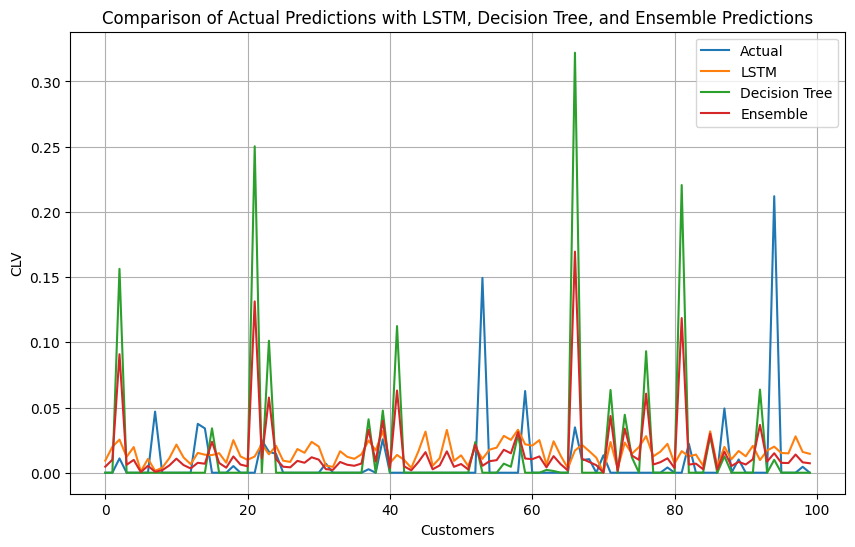

In [ ]:
import matplotlib.pyplot as plt

# comparison_df from the previous step

# Select the first 200 data points
all_comparison_df_subset = all_comparison_df[:100]

# Plot the line graph
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.plot(all_comparison_df_subset.index, all_comparison_df_subset['Actual'], label='Actual')
plt.plot(all_comparison_df_subset.index, all_comparison_df_subset['LSTM'], label='LSTM')
plt.plot(all_comparison_df_subset.index, all_comparison_df_subset['DT'], label='Decision Tree')
plt.plot(all_comparison_df_subset.index, all_comparison_df_subset['Ensemble'], label='Ensemble')
plt.xlabel('Customers')
plt.ylabel('CLV')
plt.title('Comparison of Actual Predictions with LSTM, Decision Tree, and Ensemble Predictions')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
!pip install shap

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:   4%|▍         | 8/200 [00:00<?, ?it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


ExactExplainer explainer:   5%|▌         | 10/200 [00:11<02:07,  1.49it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:   6%|▌         | 11/200 [00:12<01:38,  1.92it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:   6%|▌         | 12/200 [00:12<01:21,  2.31it/s]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:   6%|▋         | 13/200 [00:12<01:25,  2.18it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:   7%|▋         | 14/200 [00:13<01:14,  2.49it/s]

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


ExactExplainer explainer:   8%|▊         | 15/200 [00:13<01:38,  1.89it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:   8%|▊         | 16/200 [00:14<01:23,  2.22it/s]

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:   8%|▊         | 17/200 [00:14<01:12,  2.53it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:   9%|▉         | 18/200 [00:14<01:07,  2.72it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  10%|▉         | 19/200 [00:15<00:59,  3.03it/s]

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  10%|█         | 20/200 [00:15<00:58,  3.10it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  10%|█         | 21/200 [00:15<00:53,  3.35it/s]

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  11%|█         | 22/200 [00:15<00:54,  3.28it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  12%|█▏        | 23/200 [00:16<01:05,  2.69it/s]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


ExactExplainer explainer:  12%|█▏        | 24/200 [00:17<01:57,  1.50it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  12%|█▎        | 25/200 [00:18<01:38,  1.79it/s]

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


ExactExplainer explainer:  13%|█▎        | 26/200 [00:19<02:06,  1.37it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  14%|█▎        | 27/200 [00:19<01:39,  1.74it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  14%|█▍        | 28/200 [00:19<01:25,  2.01it/s]

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  14%|█▍        | 29/200 [00:20<01:10,  2.44it/s]

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  15%|█▌        | 30/200 [00:20<01:31,  1.86it/s]

44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  16%|█▌        | 31/200 [00:21<01:45,  1.60it/s]

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  16%|█▌        | 32/200 [00:22<01:30,  1.86it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


ExactExplainer explainer:  16%|█▋        | 33/200 [00:22<01:22,  2.01it/s]

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:  17%|█▋        | 34/200 [00:22<01:14,  2.23it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  18%|█▊        | 35/200 [00:23<01:08,  2.41it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  18%|█▊        | 36/200 [00:23<01:02,  2.62it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  18%|█▊        | 37/200 [00:23<00:57,  2.85it/s]

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  19%|█▉        | 38/200 [00:23<00:52,  3.10it/s]

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  20%|█▉        | 39/200 [00:24<00:50,  3.17it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  20%|██        | 40/200 [00:24<00:50,  3.20it/s]

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  20%|██        | 41/200 [00:24<00:49,  3.19it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  21%|██        | 42/200 [00:25<00:49,  3.19it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  22%|██▏       | 43/200 [00:25<00:47,  3.31it/s]

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  22%|██▏       | 44/200 [00:25<00:43,  3.62it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  22%|██▎       | 45/200 [00:25<00:44,  3.47it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  23%|██▎       | 46/200 [00:26<00:42,  3.65it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  24%|██▎       | 47/200 [00:26<00:41,  3.68it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  24%|██▍       | 48/200 [00:26<00:39,  3.82it/s]

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  24%|██▍       | 49/200 [00:26<00:39,  3.83it/s]

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  25%|██▌       | 50/200 [00:27<00:38,  3.91it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  26%|██▌       | 51/200 [00:27<00:36,  4.08it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  26%|██▌       | 52/200 [00:27<00:38,  3.82it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  26%|██▋       | 53/200 [00:27<00:36,  4.03it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  27%|██▋       | 54/200 [00:28<00:38,  3.74it/s]

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  28%|██▊       | 55/200 [00:28<00:37,  3.84it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  28%|██▊       | 56/200 [00:28<00:36,  3.91it/s]

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  28%|██▊       | 57/200 [00:29<00:36,  3.92it/s]

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  29%|██▉       | 58/200 [00:29<00:36,  3.85it/s]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  30%|██▉       | 59/200 [00:29<00:34,  4.10it/s]

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  30%|███       | 60/200 [00:29<00:35,  3.99it/s]

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  30%|███       | 61/200 [00:30<00:37,  3.67it/s]

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  31%|███       | 62/200 [00:30<00:36,  3.81it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  32%|███▏      | 63/200 [00:30<00:37,  3.62it/s]

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


ExactExplainer explainer:  32%|███▏      | 64/200 [00:31<00:49,  2.73it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  32%|███▎      | 65/200 [00:31<00:45,  2.99it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  33%|███▎      | 66/200 [00:31<00:44,  3.03it/s]

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  34%|███▎      | 67/200 [00:32<00:43,  3.07it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  34%|███▍      | 68/200 [00:32<00:38,  3.40it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  34%|███▍      | 69/200 [00:32<00:36,  3.59it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  35%|███▌      | 70/200 [00:32<00:37,  3.45it/s]

49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  36%|███▌      | 71/200 [00:33<00:46,  2.80it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  36%|███▌      | 72/200 [00:33<00:43,  2.91it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  36%|███▋      | 73/200 [00:34<00:42,  3.01it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  37%|███▋      | 74/200 [00:34<00:42,  3.00it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  38%|███▊      | 75/200 [00:34<00:42,  2.93it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  38%|███▊      | 76/200 [00:35<00:49,  2.48it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  38%|███▊      | 77/200 [00:35<00:45,  2.69it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  39%|███▉      | 78/200 [00:35<00:41,  2.95it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  40%|███▉      | 79/200 [00:36<00:37,  3.20it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  40%|████      | 80/200 [00:36<00:35,  3.41it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  40%|████      | 81/200 [00:36<00:32,  3.71it/s]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  41%|████      | 82/200 [00:36<00:32,  3.65it/s]

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  42%|████▏     | 83/200 [00:37<00:29,  3.92it/s]

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  42%|████▏     | 84/200 [00:37<00:28,  4.01it/s]

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  42%|████▎     | 85/200 [00:37<00:27,  4.24it/s]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  43%|████▎     | 86/200 [00:37<00:26,  4.25it/s]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  44%|████▎     | 87/200 [00:38<00:29,  3.83it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  44%|████▍     | 88/200 [00:38<00:28,  3.91it/s]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  44%|████▍     | 89/200 [00:38<00:28,  3.85it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  45%|████▌     | 90/200 [00:38<00:27,  3.93it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  46%|████▌     | 91/200 [00:39<00:28,  3.79it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  46%|████▌     | 92/200 [00:39<00:29,  3.72it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  46%|████▋     | 93/200 [00:39<00:28,  3.78it/s]

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  47%|████▋     | 94/200 [00:39<00:30,  3.52it/s]

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  48%|████▊     | 95/200 [00:40<00:30,  3.49it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  48%|████▊     | 96/200 [00:40<00:28,  3.63it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  48%|████▊     | 97/200 [00:40<00:29,  3.49it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  49%|████▉     | 98/200 [00:41<00:28,  3.60it/s]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  50%|████▉     | 99/200 [00:41<00:26,  3.87it/s]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  50%|█████     | 100/200 [00:41<00:25,  3.93it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  50%|█████     | 101/200 [00:41<00:24,  4.00it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  51%|█████     | 102/200 [00:41<00:24,  3.98it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  52%|█████▏    | 103/200 [00:42<00:25,  3.83it/s]

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  52%|█████▏    | 104/200 [00:42<00:26,  3.64it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  52%|█████▎    | 105/200 [00:42<00:26,  3.62it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  53%|█████▎    | 106/200 [00:43<00:26,  3.48it/s]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  54%|█████▎    | 107/200 [00:43<00:27,  3.41it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  54%|█████▍    | 108/200 [00:43<00:25,  3.57it/s]

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  55%|█████▍    | 109/200 [00:44<00:26,  3.42it/s]

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  55%|█████▌    | 110/200 [00:44<00:26,  3.36it/s]

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  56%|█████▌    | 111/200 [00:44<00:26,  3.32it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  56%|█████▌    | 112/200 [00:44<00:27,  3.26it/s]

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  56%|█████▋    | 113/200 [00:45<00:25,  3.46it/s]

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  57%|█████▋    | 114/200 [00:45<00:22,  3.77it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  57%|█████▊    | 115/200 [00:45<00:25,  3.35it/s]

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  58%|█████▊    | 116/200 [00:46<00:25,  3.25it/s]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  58%|█████▊    | 117/200 [00:46<00:24,  3.33it/s]

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  59%|█████▉    | 118/200 [00:46<00:24,  3.39it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  60%|█████▉    | 119/200 [00:47<00:25,  3.14it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  60%|██████    | 120/200 [00:47<00:26,  2.97it/s]

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:  60%|██████    | 121/200 [00:47<00:26,  2.95it/s]

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:  61%|██████    | 122/200 [00:48<00:27,  2.85it/s]

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:  62%|██████▏   | 123/200 [00:48<00:31,  2.42it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  62%|██████▏   | 124/200 [00:49<00:30,  2.50it/s]

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  62%|██████▎   | 125/200 [00:49<00:27,  2.75it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  63%|██████▎   | 126/200 [00:50<00:34,  2.15it/s]

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  64%|██████▎   | 127/200 [00:50<00:29,  2.45it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  


ExactExplainer explainer:  64%|██████▍   | 128/200 [00:51<00:34,  2.10it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  64%|██████▍   | 129/200 [00:51<00:31,  2.27it/s]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  65%|██████▌   | 130/200 [00:51<00:28,  2.49it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  66%|██████▌   | 131/200 [00:52<00:26,  2.65it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  66%|██████▌   | 132/200 [00:52<00:23,  2.93it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  66%|██████▋   | 133/200 [00:52<00:22,  2.95it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  67%|██████▋   | 134/200 [00:52<00:21,  3.11it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  68%|██████▊   | 135/200 [00:53<00:19,  3.34it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  68%|██████▊   | 136/200 [00:53<00:18,  3.39it/s]

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  68%|██████▊   | 137/200 [00:53<00:18,  3.34it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  69%|██████▉   | 138/200 [00:53<00:17,  3.57it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  70%|██████▉   | 139/200 [00:54<00:17,  3.47it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  70%|███████   | 140/200 [00:54<00:16,  3.70it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  70%|███████   | 141/200 [00:54<00:15,  3.78it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  71%|███████   | 142/200 [00:54<00:14,  3.89it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  72%|███████▏  | 143/200 [00:55<00:15,  3.65it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  72%|███████▏  | 144/200 [00:55<00:15,  3.68it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  72%|███████▎  | 145/200 [00:55<00:15,  3.63it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  73%|███████▎  | 146/200 [00:56<00:14,  3.62it/s]

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  74%|███████▎  | 147/200 [00:56<00:15,  3.45it/s]

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  74%|███████▍  | 148/200 [00:56<00:14,  3.55it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  74%|███████▍  | 149/200 [00:57<00:15,  3.39it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  75%|███████▌  | 150/200 [00:57<00:14,  3.52it/s]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  76%|███████▌  | 151/200 [00:57<00:13,  3.74it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  76%|███████▌  | 152/200 [00:57<00:13,  3.65it/s]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  76%|███████▋  | 153/200 [00:58<00:12,  3.89it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  77%|███████▋  | 154/200 [00:58<00:12,  3.67it/s]

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  78%|███████▊  | 155/200 [00:58<00:13,  3.43it/s]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  78%|███████▊  | 156/200 [00:59<00:13,  3.25it/s]

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


ExactExplainer explainer:  78%|███████▊  | 157/200 [00:59<00:13,  3.10it/s]

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  79%|███████▉  | 158/200 [00:59<00:13,  3.01it/s]

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  80%|███████▉  | 159/200 [01:00<00:13,  2.98it/s]

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  80%|████████  | 160/200 [01:00<00:13,  2.98it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  80%|████████  | 161/200 [01:00<00:15,  2.57it/s]

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  81%|████████  | 162/200 [01:01<00:13,  2.77it/s]

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  82%|████████▏ | 163/200 [01:01<00:12,  2.89it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  82%|████████▏ | 164/200 [01:01<00:12,  2.96it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  82%|████████▎ | 165/200 [01:02<00:11,  3.13it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  83%|████████▎ | 166/200 [01:02<00:09,  3.48it/s]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  84%|████████▎ | 167/200 [01:02<00:08,  3.81it/s]

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  84%|████████▍ | 168/200 [01:02<00:08,  3.56it/s]

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  84%|████████▍ | 169/200 [01:03<00:08,  3.68it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  85%|████████▌ | 170/200 [01:03<00:08,  3.74it/s]

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  86%|████████▌ | 171/200 [01:03<00:07,  3.98it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  86%|████████▌ | 172/200 [01:03<00:06,  4.01it/s]

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  86%|████████▋ | 173/200 [01:04<00:06,  3.94it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  87%|████████▋ | 174/200 [01:04<00:07,  3.70it/s]

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  88%|████████▊ | 175/200 [01:04<00:06,  3.68it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  88%|████████▊ | 176/200 [01:04<00:06,  3.58it/s]

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  88%|████████▊ | 177/200 [01:05<00:06,  3.59it/s]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  89%|████████▉ | 178/200 [01:05<00:05,  3.75it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  90%|████████▉ | 179/200 [01:05<00:05,  3.93it/s]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  90%|█████████ | 180/200 [01:06<00:05,  3.73it/s]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  90%|█████████ | 181/200 [01:06<00:04,  3.84it/s]

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  91%|█████████ | 182/200 [01:06<00:04,  4.07it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  92%|█████████▏| 183/200 [01:06<00:04,  4.05it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  92%|█████████▏| 184/200 [01:07<00:04,  3.70it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  92%|█████████▎| 185/200 [01:07<00:04,  3.71it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  93%|█████████▎| 186/200 [01:07<00:03,  3.66it/s]

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  94%|█████████▎| 187/200 [01:07<00:03,  3.50it/s]

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  94%|█████████▍| 188/200 [01:08<00:03,  3.80it/s]

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  94%|█████████▍| 189/200 [01:08<00:02,  3.87it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  95%|█████████▌| 190/200 [01:08<00:02,  3.65it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer:  96%|█████████▌| 191/200 [01:08<00:02,  3.54it/s]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  96%|█████████▌| 192/200 [01:09<00:02,  3.79it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  96%|█████████▋| 193/200 [01:09<00:01,  3.59it/s]

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  97%|█████████▋| 194/200 [01:09<00:01,  3.52it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  98%|█████████▊| 195/200 [01:10<00:01,  3.59it/s]

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  98%|█████████▊| 196/200 [01:10<00:01,  3.54it/s]

43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  98%|█████████▊| 197/200 [01:10<00:00,  3.72it/s]

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer:  99%|█████████▉| 198/200 [01:10<00:00,  3.80it/s]

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


ExactExplainer explainer: 100%|█████████▉| 199/200 [01:11<00:00,  3.54it/s]

48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer: 100%|██████████| 200/200 [01:11<00:00,  3.26it/s]

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


ExactExplainer explainer: 201it [01:11,  2.69it/s]


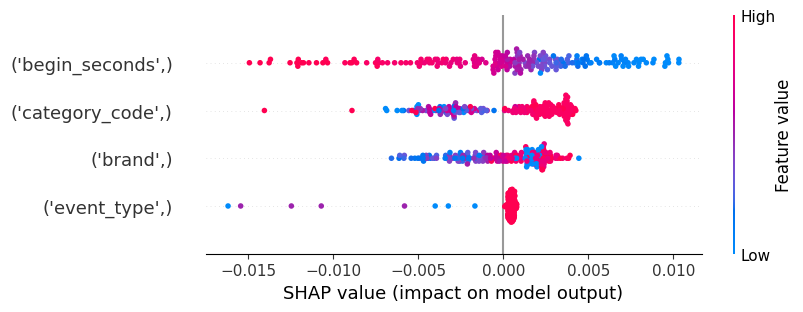

In [ ]:
import shap
import pandas as pd
import numpy as np

# X_test, y_test, ensemble_pred, dt_model, and lstm_model from previous steps

# 1. Create a SHAP explainer
# Define a custom prediction function because of the ensemble model
def ensemble_predict_fn(X):
    dt_pred = dt_model.predict(X)
    X_reshaped = X.values.reshape(X.shape[0], 1, X.shape[1])  # Reshape for LSTM
    lstm_pred = lstm_model.predict(X_reshaped).flatten()
    #return (dt_pred + lstm_pred) / 2
    return lstm_pred

explainer = shap.Explainer(ensemble_predict_fn, X_test[:200]) # Use first 200 samples of X_test

# 2. Calculate SHAP values
shap_values = explainer(X_test[:200])  # Use first 200 samples of X_test

# 3. Visualize the SHAP values
shap.plots.beeswarm(shap_values)
# OR
# shap.summary_plot(shap_values, X_test[:200])

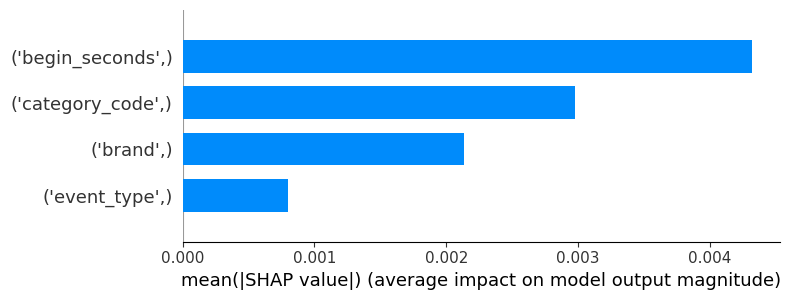

In [ ]:
shap.summary_plot(shap_values, X_test[:200], plot_type='bar')

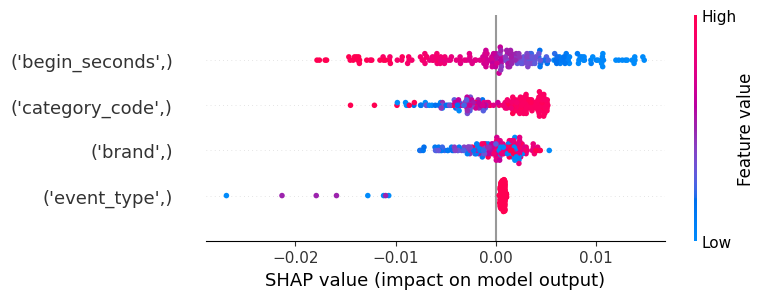

In [ ]:
shap.summary_plot(shap_values, X_test[:200])